## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [2]:
#1 Import the dataset (Housing.csv) and look at the top five rows
import pandas as pd
df = pd.read_csv('/home/user/Downloads/Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [11]:
#2 Check the shape of the DataFrame (rows, columns)
print('rows=:',df.shape[0],'columns:',df.shape[1])
print(df.shape)

rows=: 545 columns: 13
(545, 13)


In [12]:
#3 Look at the data types of the columns
print(df.dtypes)

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [3]:
#4 Check for missing  values if any, replace with appropriate values
print(df.isnull().sum()) #ther is no null value
print(df.fillna(df.mean(numeric_only=True)).fillna(df.mode().iloc[0]))


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1    

In [4]:
#5 Prepare  X (independent variables) and y (dependent variable)
x= df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 
        'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 
        'parking', 'prefarea', 'furnishingstatus']]
y = df['price']
print(x,y)

     area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    7420         4          2        3      yes        no       no   
1    8960         4          4        4      yes        no       no   
2    9960         3          2        2      yes        no      yes   
3    7500         4          2        2      yes        no      yes   
4    7420         4          1        2      yes       yes      yes   
..    ...       ...        ...      ...      ...       ...      ...   
540  3000         2          1        1      yes        no      yes   
541  2400         3          1        1       no        no       no   
542  3620         2          1        1      yes        no       no   
543  2910         3          1        1       no        no       no   
544  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
0                no             yes        2      yes        furnished  
1

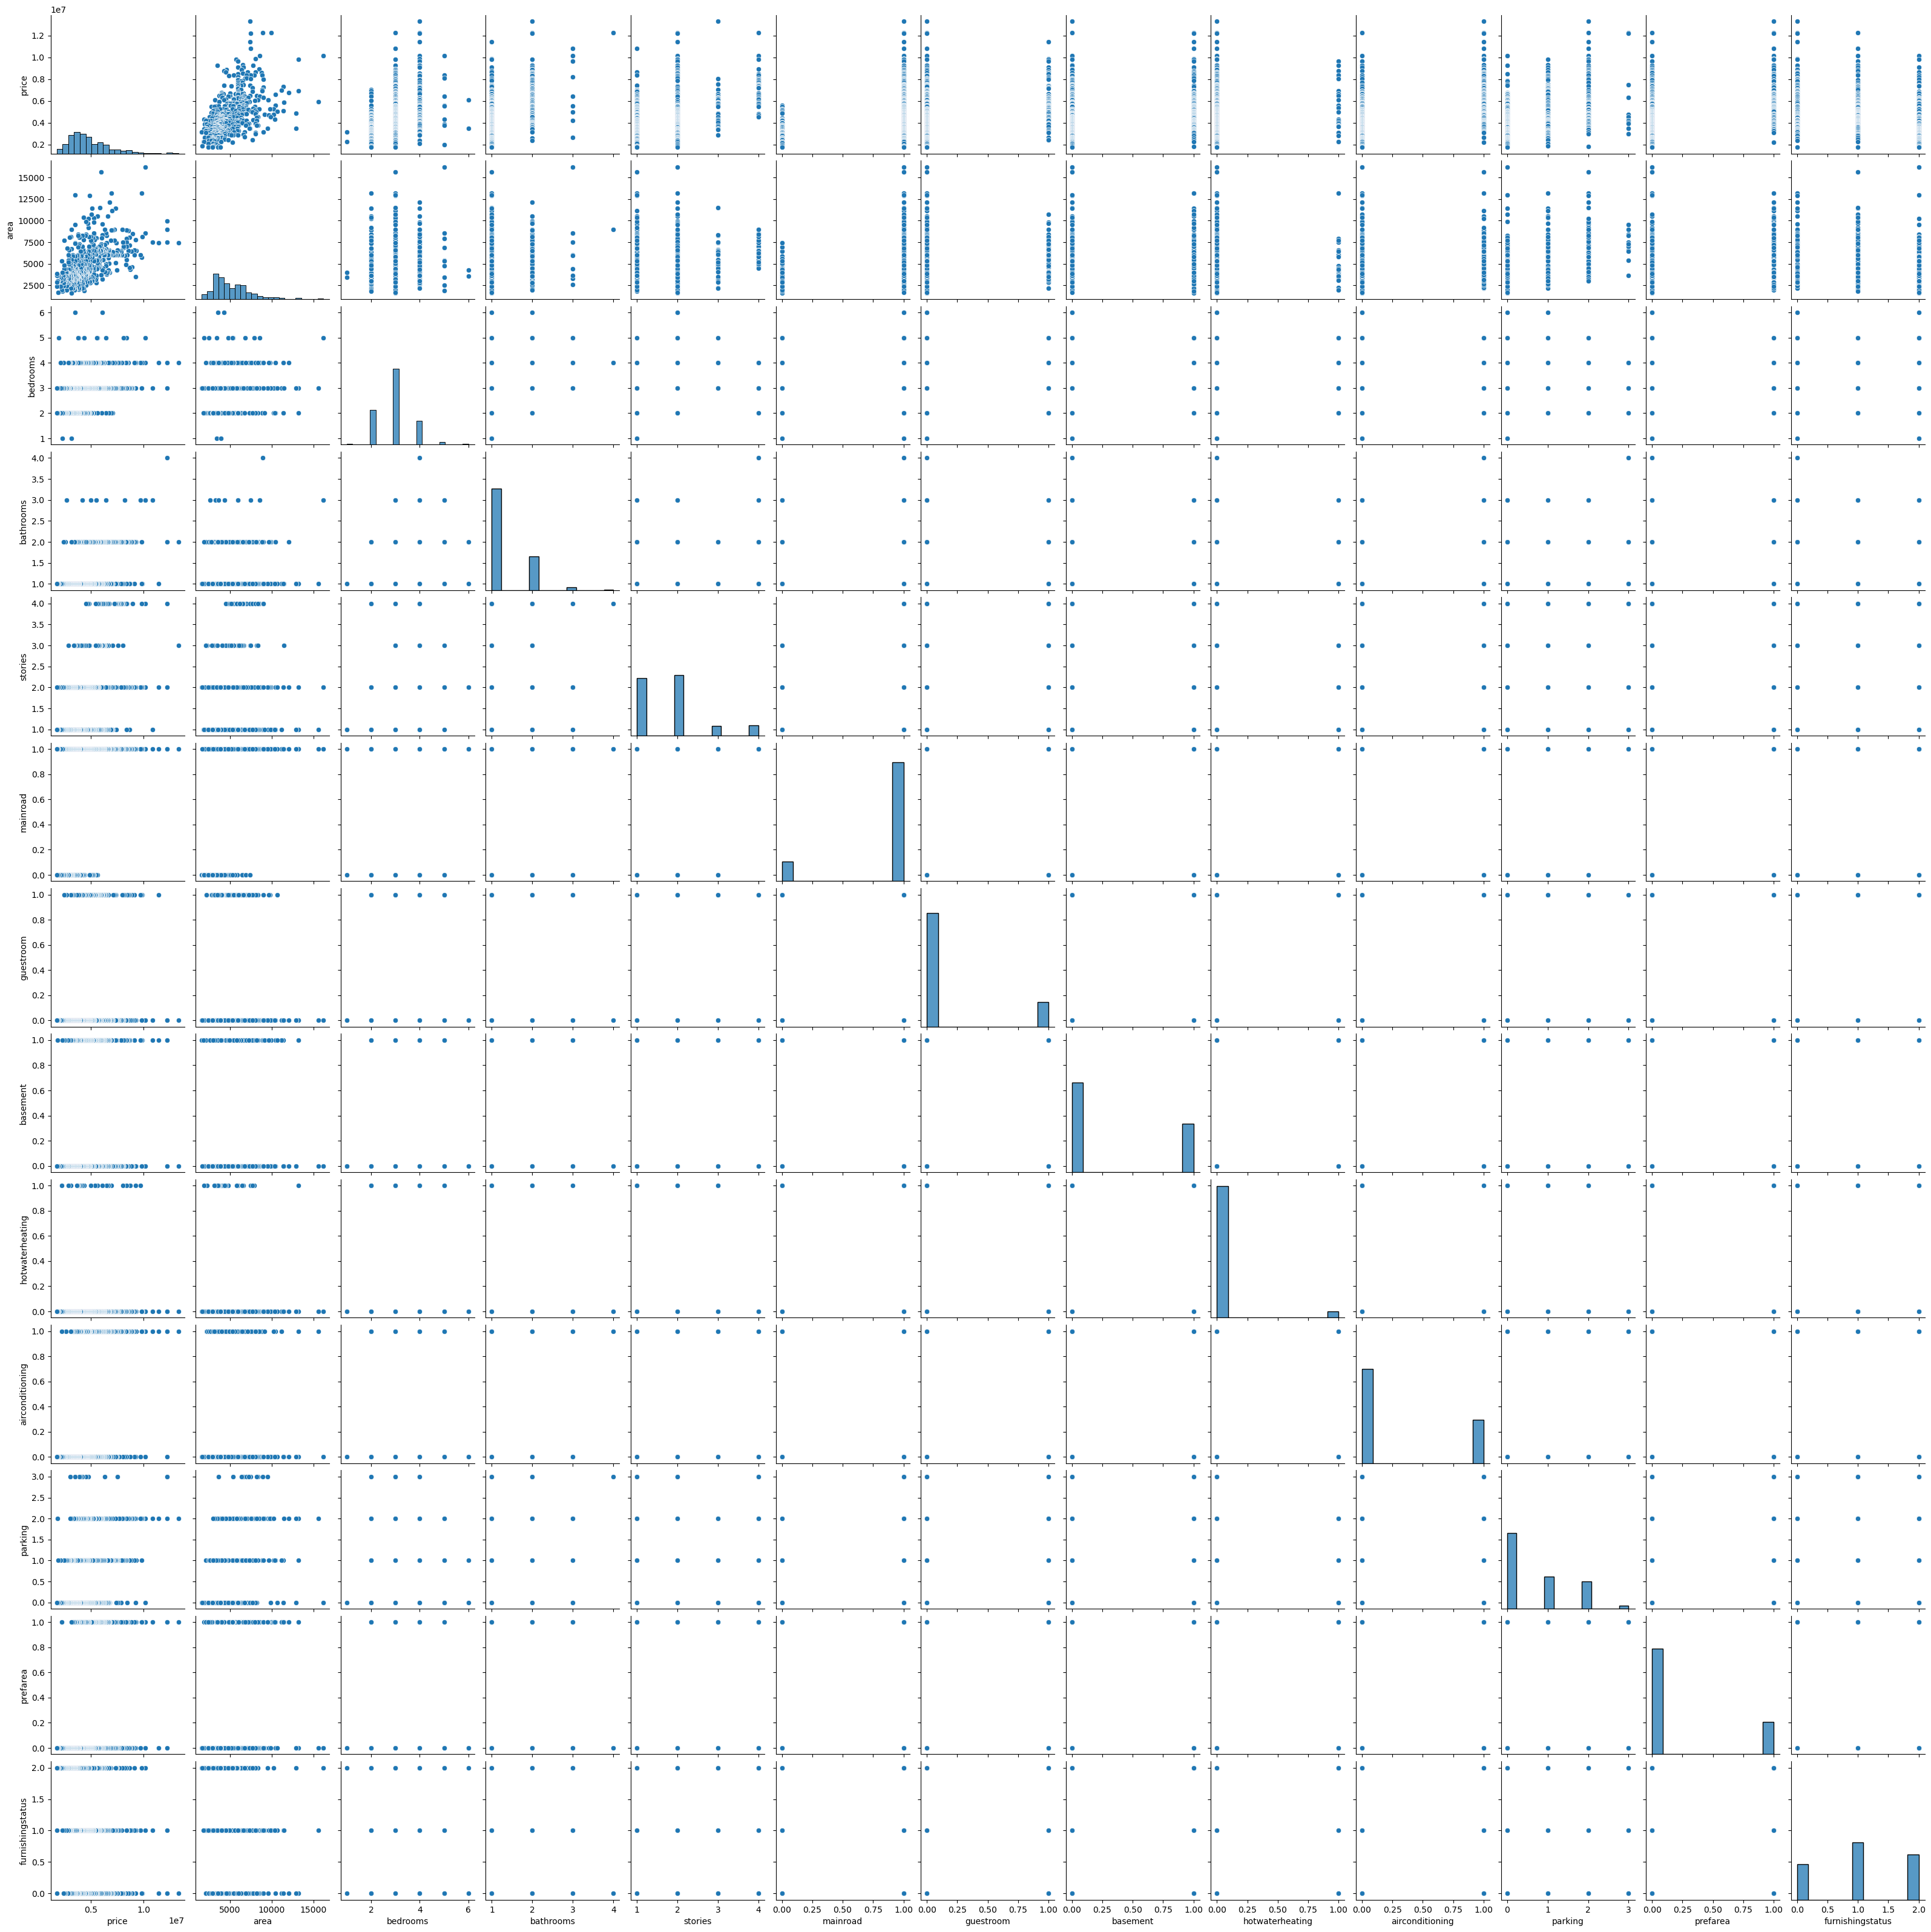

In [39]:
#6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots
#import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns

# Loop through each independent variable and create scatter plots
#for col in ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 
            #'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 
            #'parking', 'prefarea', 'furnishingstatus']:
    
    #plt.figure(figsize=(8, 5))
    #sns.scatterplot(x=df[col], y=df['price'])
    #plt.xlabel(col)
    #plt.ylabel("Price")
    #plt.title(f"Scatter plot of {col} vs Price")
    #plt.show()
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define figure size
sns.pairplot(df)
#sns.scatterplot(df)



In [5]:
#7 Encoding categorical data in X
from sklearn.preprocessing import LabelEncoder

# Apply label encoding to ordinal categorical features
le = LabelEncoder()
df['furnishingstatus'] = le.fit_transform(df['furnishingstatus'])

# Encode other binary categorical features (Yes/No to 1/0)
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_cols] = df[binary_cols].apply(lambda col: col.map({'yes': 1, 'no': 0}))

# Select features
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad', 
        'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 
        'prefarea', 'furnishingstatus']]

print(X.head())


   area  bedrooms  bathrooms  stories  parking  mainroad  guestroom  basement  \
0  7420         4          2        3        2         1          0         0   
1  8960         4          4        4        3         1          0         0   
2  9960         3          2        2        2         1          0         1   
3  7500         4          2        2        3         1          0         1   
4  7420         4          1        2        2         1          1         1   

   hotwaterheating  airconditioning  prefarea  furnishingstatus  
0                0                1         1                 0  
1                0                1         0                 0  
2                0                0         1                 1  
3                0                1         1                 0  
4                0                1         0                 0  


In [40]:
#8  Avoiding the Dummy Variable Trap
#import pandas as pd

# List of categorical columns
#categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                    #'airconditioning', 'prefarea', 'furnishingstatus']

# One-hot encode categorical variables while avoiding the dummy variable trap
#X_encoded = pd.get_dummies(df[categorical_cols], drop_first=True)

# Select numerical features
#X_numerical = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]

# Concatenate numerical and encoded categorical features
#X = pd.concat([X_numerical, X_encoded], axis=1)

# Display the transformed DataFrame
#print(X.head())


In [6]:
#9 Apply feature scaling on numerical variables
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# Selecting numerical columns
numerical_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Initialize MinMaxScaler
scaler = MinMaxScaler()
#scaler = StandardScaler()

# Apply scaling
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the transformed DataFrame
print(df.head())


      price      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
0  13300000  0.396564       0.6   0.333333  0.666667         1          0   
1  12250000  0.502405       0.6   1.000000  1.000000         1          0   
2  12250000  0.571134       0.4   0.333333  0.333333         1          0   
3  12215000  0.402062       0.6   0.333333  0.333333         1          0   
4  11410000  0.396564       0.6   0.000000  0.333333         1          1   

   basement  hotwaterheating  airconditioning   parking  prefarea  \
0         0                0                1  0.666667         1   
1         0                0                1  1.000000         0   
2         1                0                0  0.666667         1   
3         1                0                1  1.000000         1   
4         1                0                1  0.666667         0   

   furnishingstatus  
0                 0  
1                 0  
2                 1  
3                 0  
4           

In [7]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split

# Define independent (X) and dependent (y) variables
X = df.drop(columns=['price'])  # Features (independent variables)
y = df['price']  # Target variable (dependent variable)

# Split the dataset (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display dataset shapes
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (381, 12), y_train shape: (381,)
X_test shape: (164, 12), y_test shape: (164,)


In [9]:
#11 Fitting Multifrom sklearn.linear_model import LinearRegression

from sklearn.linear_model import LinearRegression

# Initialize the model
regressor = LinearRegression()

# Fit the model on the training set
regressor.fit(X_train, y_train)

# Display model coefficients and intercept
print("Intercept:", regressor.intercept_)
print("Coefficients:", regressor.coef_)



Intercept: 2157619.4641746758
Coefficients: [3682056.87780971  413674.37285156 3352118.5998914  1247403.36755831
  408320.46478164  279534.04145787  484980.21525134  619934.34714776
  680006.92089593  912234.99829967  509441.46380309 -198031.32519469]


In [10]:
#12 Predict on the train set and calculate the error = y_pred - y_train
# Predict on the training set
y_train_pred = regressor.predict(X_train)

# Calculate the error
train_error = y_train_pred - y_train

# Display the first few errors
print("First 10 Training Errors:")
print(train_error.head(10))


First 10 Training Errors:
126   -5.477012e+05
363   -1.499996e+05
370    7.643610e+05
31    -1.977171e+06
113    2.678948e+05
222    1.365804e+06
462    7.490101e+04
177   -6.017257e+05
57     1.566990e+06
244    6.018739e+05
Name: price, dtype: float64


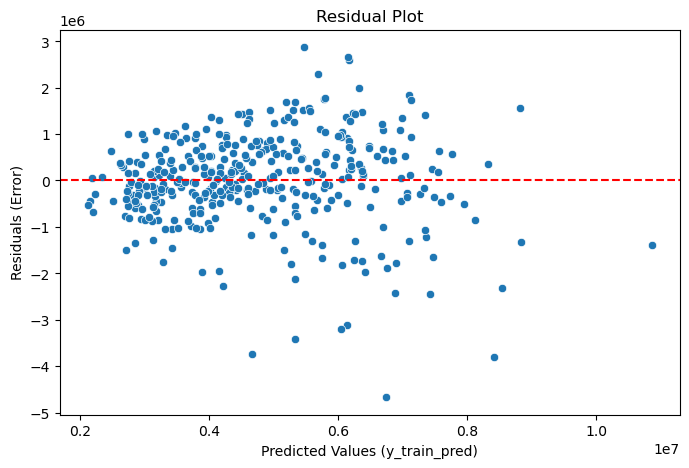

In [11]:
#13  Residual plot - plot y_pred in x axis and errors in y axis
import matplotlib.pyplot as plt
import seaborn as sns

# Plot residuals
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_train_pred, y=train_error)

# Plot a horizontal line at 0 (ideal residuals)
plt.axhline(y=0, color='red', linestyle='--')

# Labels and title
plt.xlabel("Predicted Values (y_train_pred)")
plt.ylabel("Residuals (Error)")
plt.title("Residual Plot")

# Show the plot
plt.show()


In [53]:
#14  Predic on the test set
# Predict on the test set
y_test_pred = regressor.predict(X_test)

# Display the first 10 predicted values
print("First 10 Predicted Values on Test Set:")
print(y_test_pred[:10])


First 10 Predicted Values on Test Set:
[5407508.87024418 7097185.46706854 3055462.44314053 4476945.19636315
 3315983.65663579 3618373.03255258 5758111.46044026 6466502.43909127
 2830273.16469119 2588804.65810569]


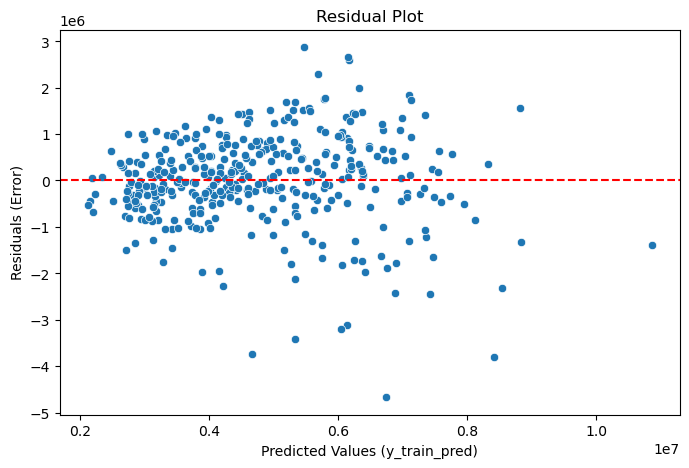

In [12]:
#15 Residual plot - plot y_pred in x axis and errors in y axis
import matplotlib.pyplot as plt
import seaborn as sns

# Plot residuals
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_train_pred, y=train_error)

# Plot a horizontal line at 0 (ideal residuals)
plt.axhline(y=0, color='red', linestyle='--')

# Labels and title
plt.xlabel("Predicted Values (y_train_pred)")
plt.ylabel("Residuals (Error)")
plt.title("Residual Plot")

# Show the plot
plt.show()


In [56]:
#16 Print Mean Squared Error and R Squared Value
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_test_pred)

# Calculate R² Score
r2 = r2_score(y_test, y_test_pred)

# Print results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R Squared (R²) Value: {r2}")


Mean Squared Error (MSE): 1994283800024.4258
R Squared (R²) Value: 0.5369013863691389


In [55]:
#17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all)
def adjusted_r2(r2, n, k):
    """Calculate Adjusted R-Squared"""
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Selecting different sets of features
feature_sets = [
    ['area', 'bedrooms', 'bathrooms'],  # Small feature set
    ['area', 'bathrooms', 'stories', 'parking'],  # Medium feature set
    ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'parking']  # Larger feature set
]

# Iterate over different feature sets
for features in feature_sets:
    # Prepare X with selected features
    X_selected = df[features]
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on test set
    y_test_pred = model.predict(X_test)

    # Compute R² and Adjusted R²
    r2 = r2_score(y_test, y_test_pred)
    adj_r2 = adjusted_r2(r2, X_test.shape[0], len(features))

    # Print results
    print(f"Feature Set: {features}")
    print(f"R²: {r2:.4f}, Adjusted R²: {adj_r2:.4f}\n")


Feature Set: ['area', 'bedrooms', 'bathrooms']
R²: 0.4474, Adjusted R²: 0.4370

Feature Set: ['area', 'bathrooms', 'stories', 'parking']
R²: 0.5219, Adjusted R²: 0.5099

Feature Set: ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'parking']
R²: 0.5369, Adjusted R²: 0.5192

